# Clustering with and without Autoencoders

### Data comes from this [dataset](https://www.kaggle.com/arjunbhasin2013/ccdata) from kaggle.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow import keras
from yellowbrick.cluster import KElbowVisualizer

## Loading the dataset CC_GENERAL to a dataframe

In [2]:
path_to_data = os.getcwd().replace("\\", "/") + "/CC_GENERAL.csv"
credit_card_df = pd.read_csv(path_to_data)
credit_card_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Information about the Dataset columns

1. CUSTID: Identification of Credit Card holder 
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
13. PURCHASES_TRX: Number of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user  
17. PRC_FULL_PAYMENT: Percent of full payment paid by user
18. TENURE: Tenure of credit card service for user

In [3]:
print(f"{credit_card_df.shape[1]} columns with {credit_card_df.shape[0]} data points")

18 columns with 8950 data points


In [4]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Some statistics about the Dataset

*BALANCE* mean is around 1500$, wich means most costumers left around 1500$ in their accounts to make purchases <br>
*BALANCE_FREQUENCY* mean is around 1, wich means most costumers update their balance frequently <br>
*PURCHASES* mean is around 1000$, wich means most costumers purchases are around 1000$ <br>
*ONEOFF_PURCHASES* mean is around 600$, wich means most costumers one off purchase is around 600$ <br>
*INSTALLMENTS_PURCHASES* mean is around 400$, wich means most costumers spend 400$ in installments <br>
*CASH_ADVANCE* mean is around 1000$, wich means most costumers give 1000$ in advance <br>
*PURCHASES_FREQUENCY* mean is around 0.5, wich means most costumers purchases frequency are not frequent but are not frenquently as well <br>
the means of *ONEOFF_PURCHASES_FREQUENCY*, *PURCHASES_INSTALLMENTS_FREQUENCY*, *CASH_ADVANCE_FREQUENCY* are low, wich means most costumers dont do one off the purchases <br>
*CREDIT_LIMIT* mean is around 4500$, wich means most costumers have 4500$ has their credit card limit <br>
*PRC_FULL_PAYMENT* mean is around 15%, wich means most costumers have paid 15% of the full payment they need to make <br>
*TENURE* mean is around 11.5 years, wich means most costumers repayment period is around 11.5 years <br>

In [5]:
credit_card_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Explore the Dataset

### How many missing values

In [6]:
null_series = credit_card_df.isnull().sum()
print(null_series[null_series > 0])

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


## Fill up the missing values from CREDIT_LIMIT and MINIMUM_PAYMENTS with the respective mean

In [7]:
credit_card_df.loc[(credit_card_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = credit_card_df["CREDIT_LIMIT"].mean()

In [8]:
credit_card_df.loc[(credit_card_df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = credit_card_df["MINIMUM_PAYMENTS"].mean()

## As we can see, no missing values now

In [9]:
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## For clustering, knowing the costumer id is not necessary so we are going to drop the column

In [10]:
# drop column CUST_ID, axis = 1 because it is a column and not a row, and inplace = True so it applies the changed directly to the dataframe
credit_card_df.drop("CUST_ID", axis = 1, inplace = True)

In [11]:
credit_card_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Ploting columns histograms and density distribution

PURCHASES_FREQUENCY have two distint groups of costumers <br>


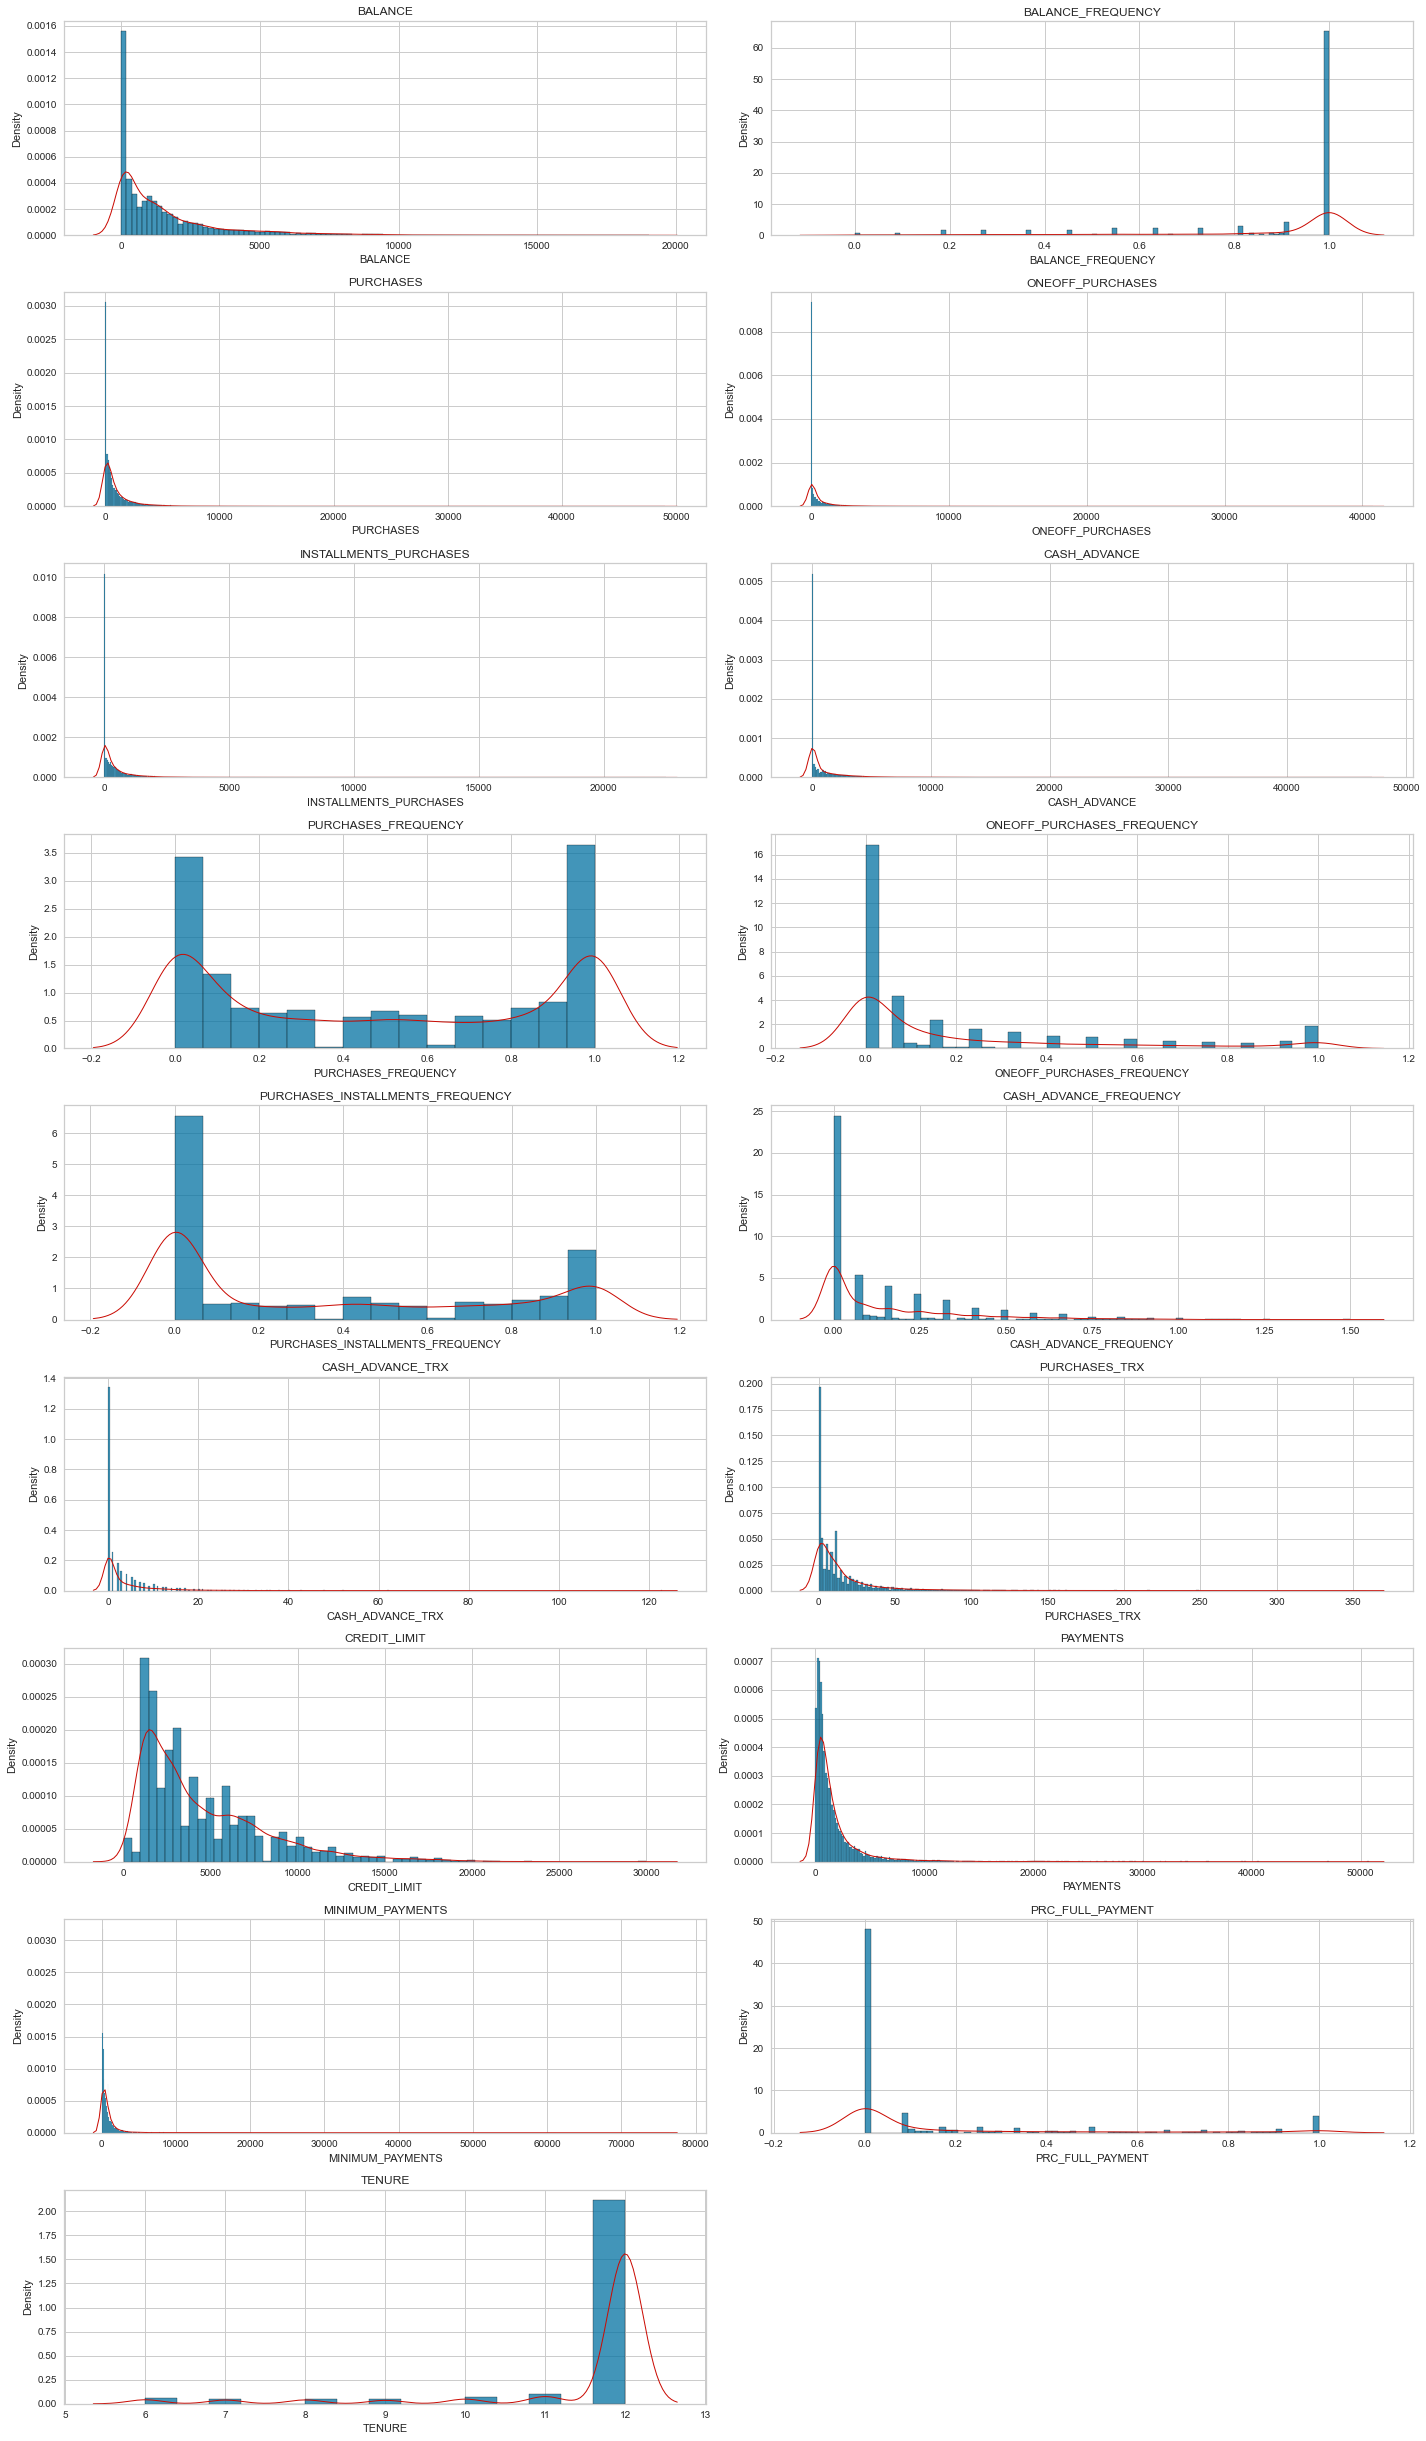

In [12]:
plt.figure(figsize=(20, 60))

for i in range(len(credit_card_df.columns)):
    plt.subplot(16, 2, i + 1)
    sns.histplot(credit_card_df.iloc[:, i], stat="density")
    sns.kdeplot(credit_card_df.iloc[:, i], color="r", lw=1)
    plt.title(credit_card_df.columns[i])

plt.tight_layout()

## Clustering

### K-means:
- is an unsupervised learning algorithm (clustering)
- works by grouping some data points together (clustering) in an unsupervised fashion
- The algorithm groups observations with similiar attribute values together by measuring the Euclidian distance between points

### K-means algorithm steps:
1. Choose number of clusters "K"
2. Select random K points that are going to be the centroids for each cluster
3. Assign each data point to the nearest centroid, doind so will enable us to create "K" number of clusters
4. Calculate a new centroid for each cluster
5. Reassign each data point to the new closest centroid
6. Go to step 4 and repeat

### "Elbow method" to select the optimal number of clusters (K):
- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best

## First let´s scale the data

In [13]:
scaler = StandardScaler()
credit_card_df_scaled = scaler.fit_transform(credit_card_df)

## Find the right number of clusters

### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion

In [15]:
# scores_K = []
# possible_K_values = np.arange(1, 21)

# for possible_K in possible_K_values:
#     kmeans = KMeans(possible_K, random_state = 42)
#     kmeans.fit(credit_card_df_scaled)
#     scores_K.append(kmeans.inertia_)
# plt.figure(figsize = (10, 10))
# plt.plot(scores_K, 'bx-')
# plt.title('Finding the right number of clusters')
# plt.xlabel('Clusters')
# plt.ylabel('Scores') 
# plt.show()

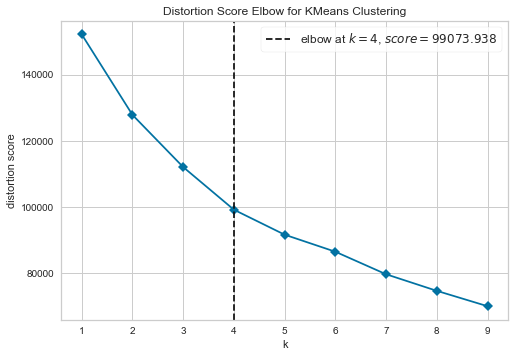

Optimal K value is 4


In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10), timings = False)
visualizer.fit(credit_card_df_scaled)
visualizer.show()
scores_K = visualizer.k_scores_
K = visualizer.elbow_value_
print(f"Optimal K value is {K}")

## Apply K-means method

In [17]:
kmeans = KMeans(K, random_state = 42)
kmeans.fit(credit_card_df_scaled)
labels = kmeans.labels_

In [18]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = credit_card_df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
1,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
2,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


## Perform inverse transormation on the centers

In [19]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns = credit_card_df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [20]:
y_kmeans = kmeans.fit_predict(credit_card_df_scaled)
y_kmeans

array([2, 1, 0, ..., 0, 2, 2])

## Concatenate the clusters labels to the original dataframe

In [21]:
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster': labels})], axis = 1)
credit_card_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


## Plot the histogram of various clusters

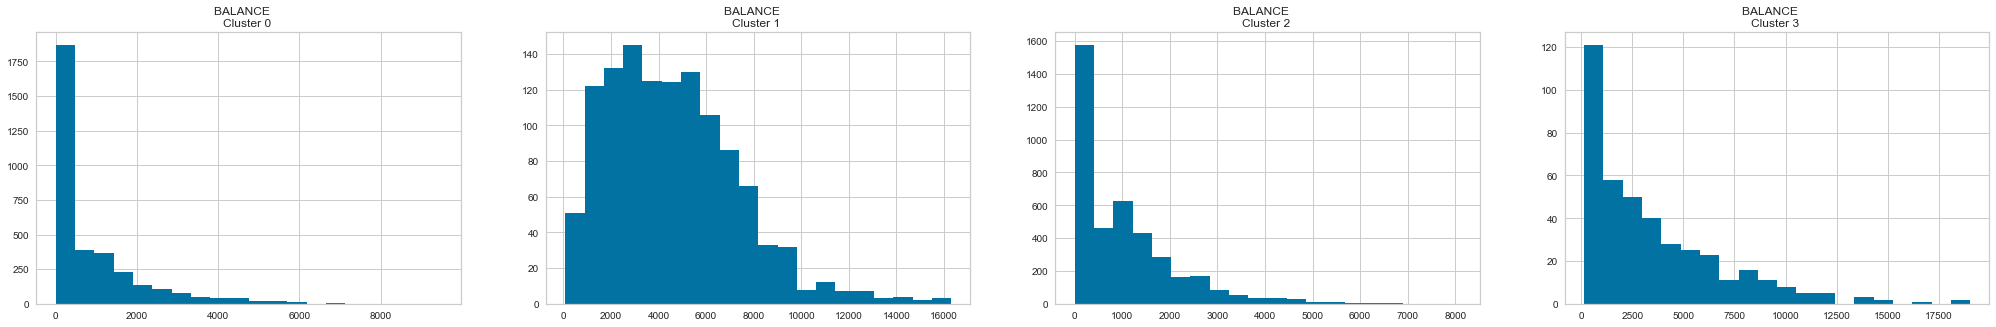

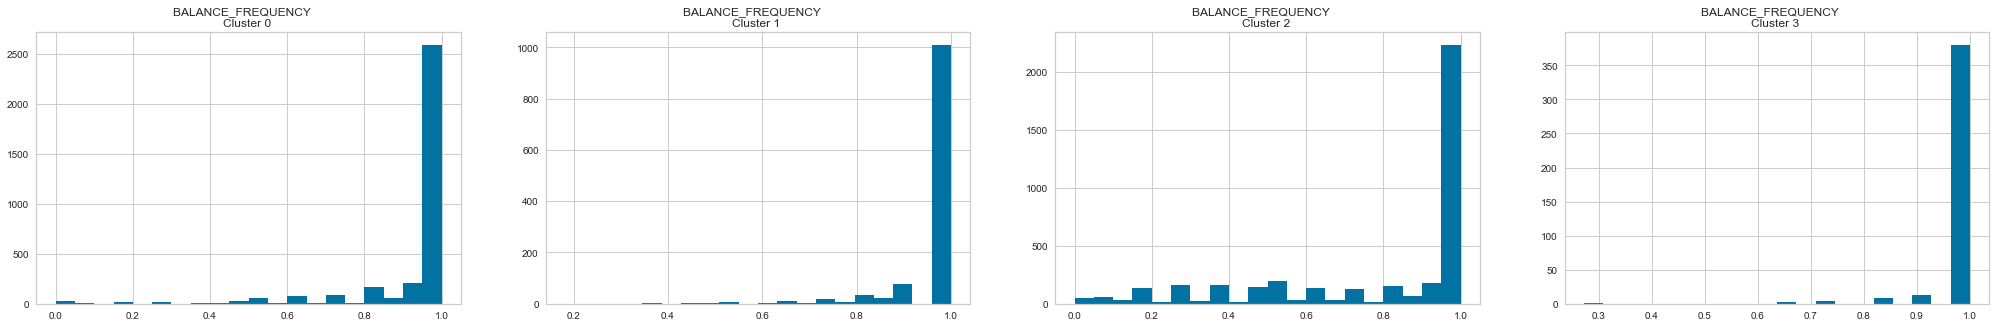

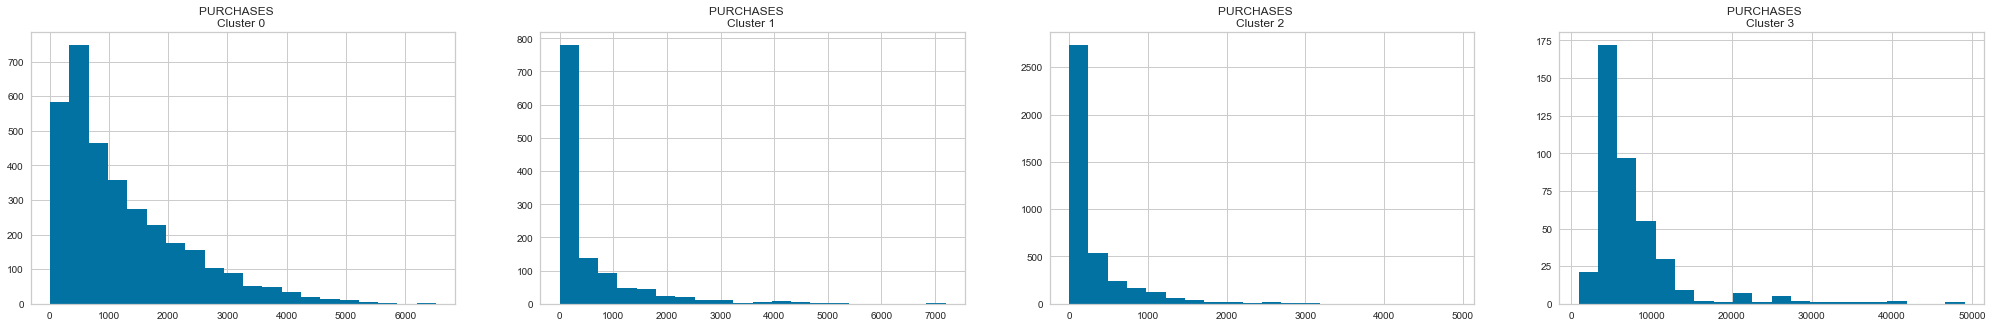

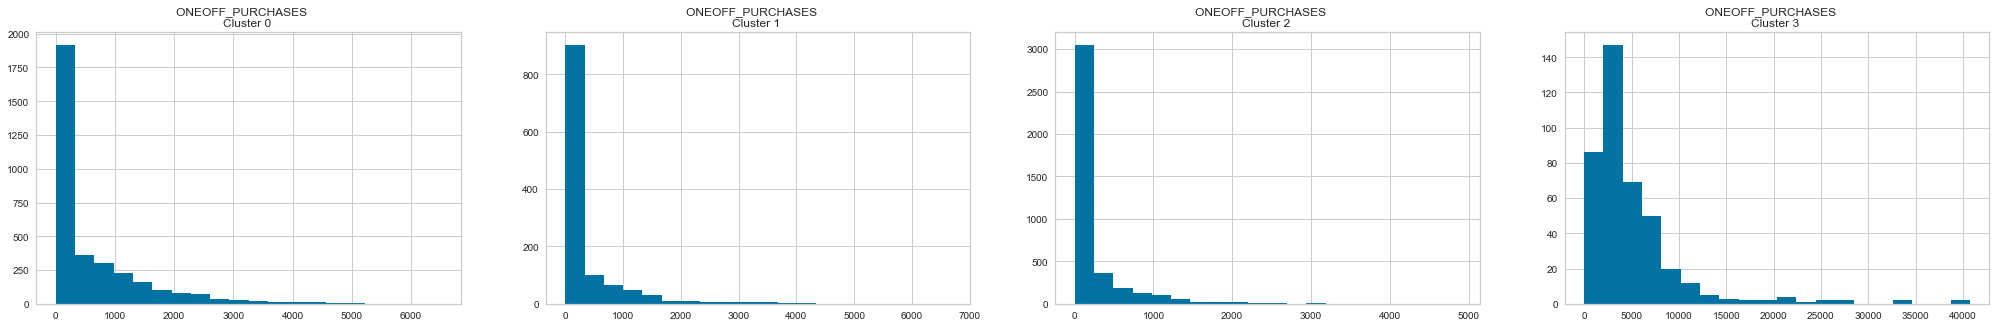

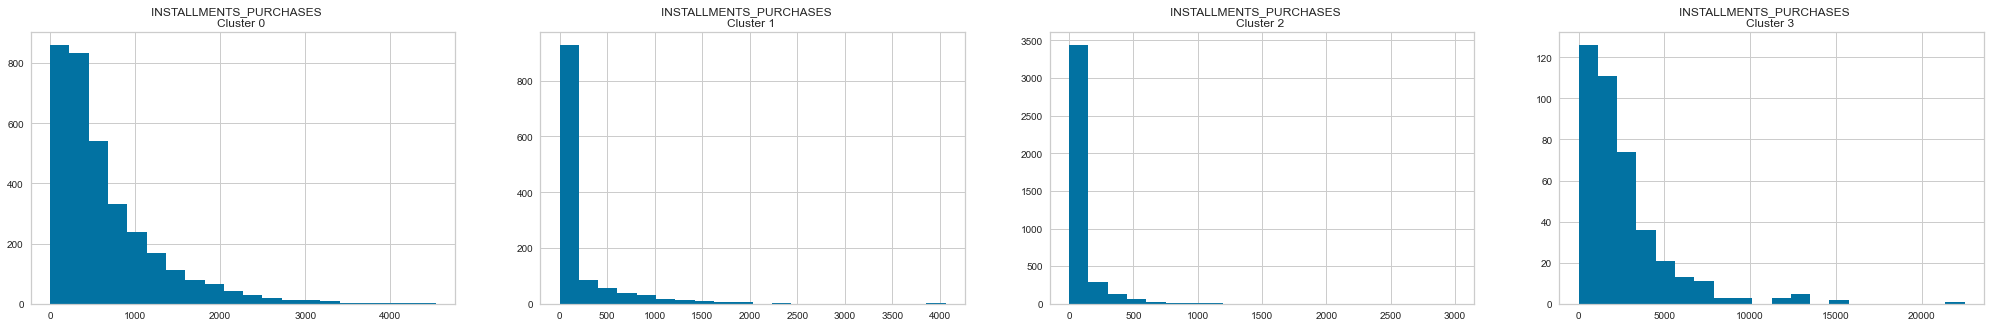

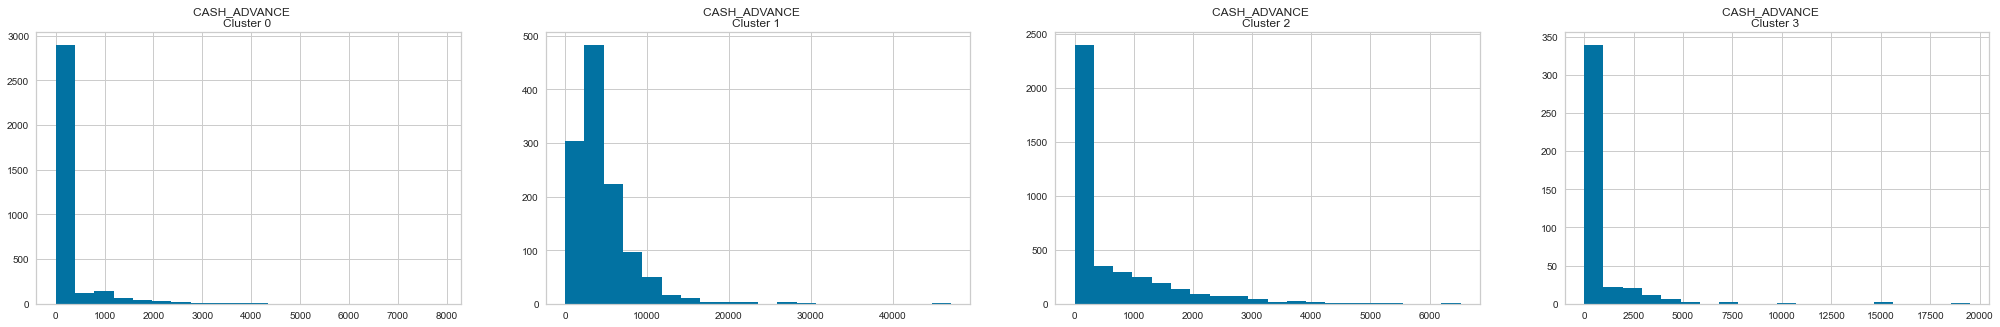

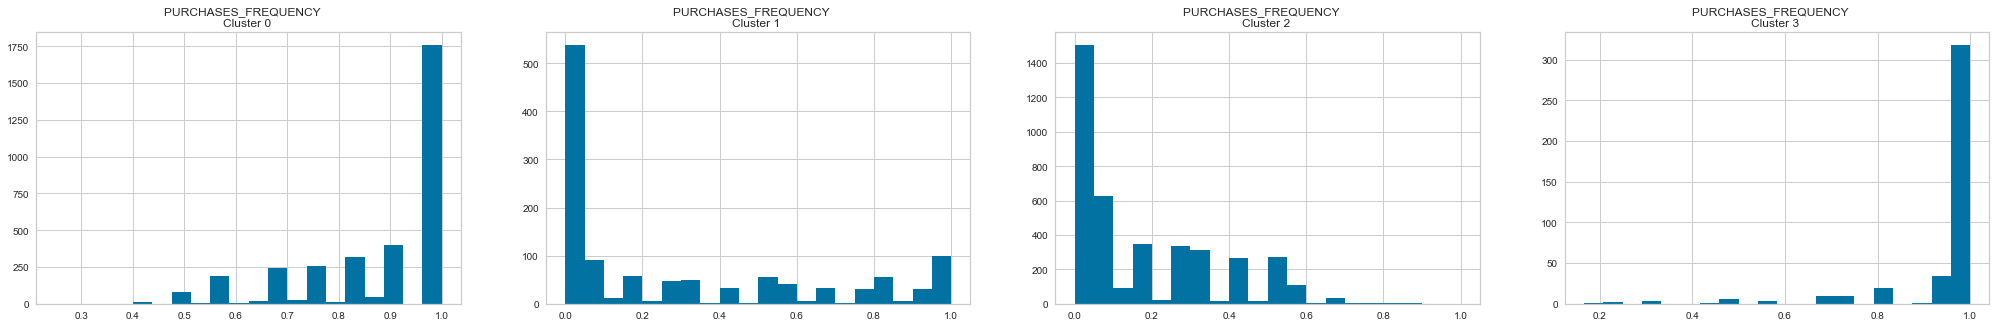

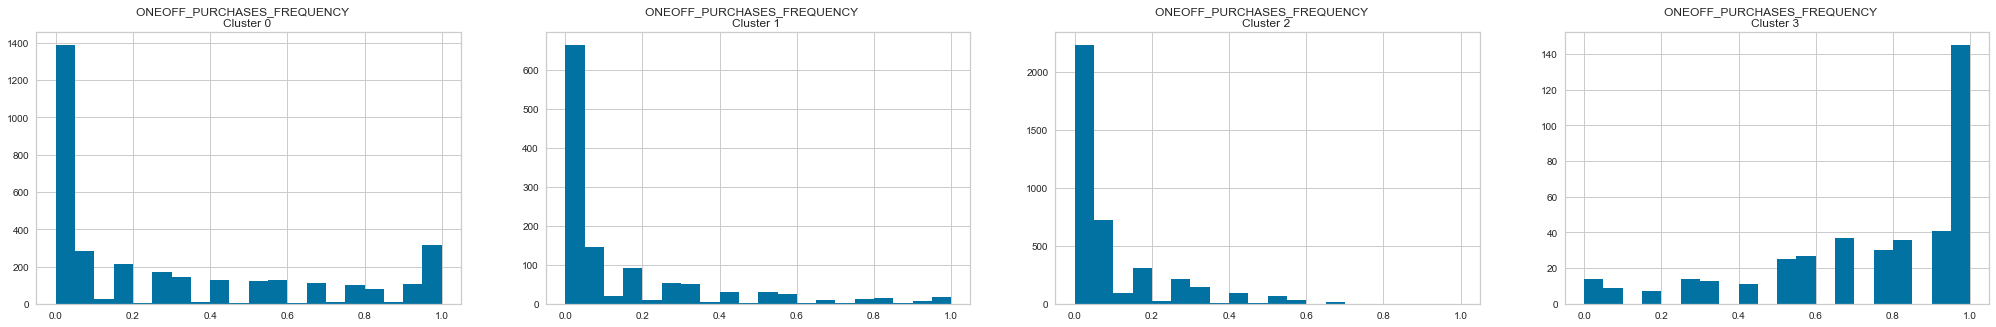

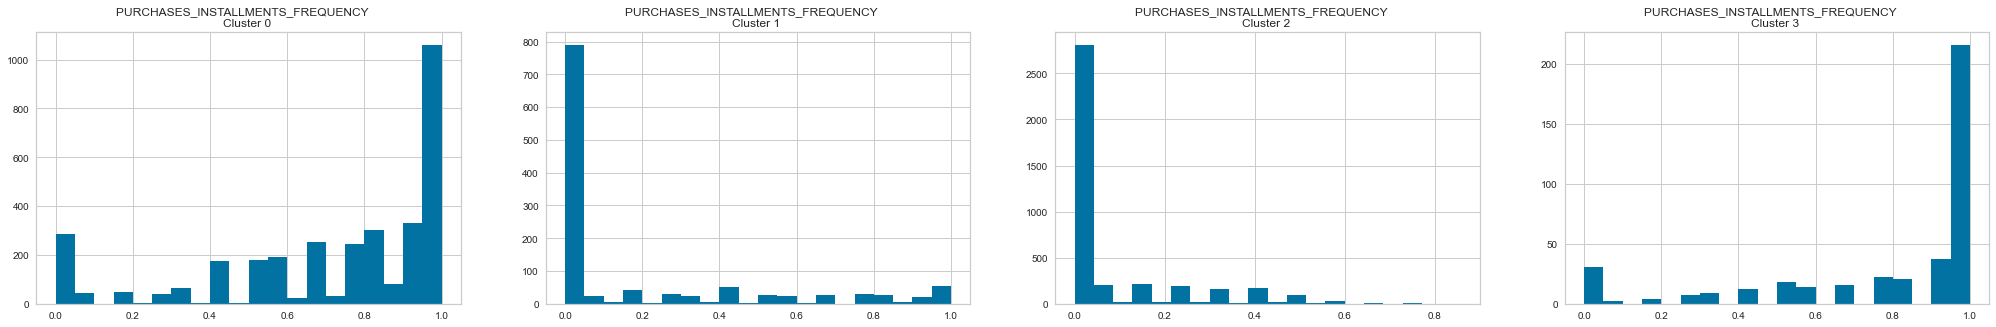

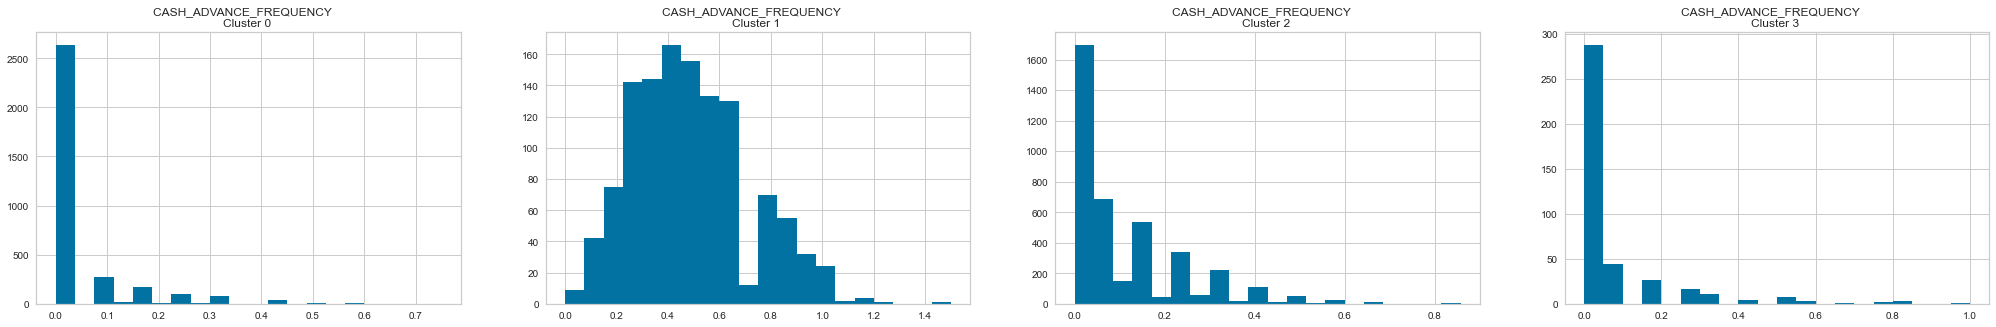

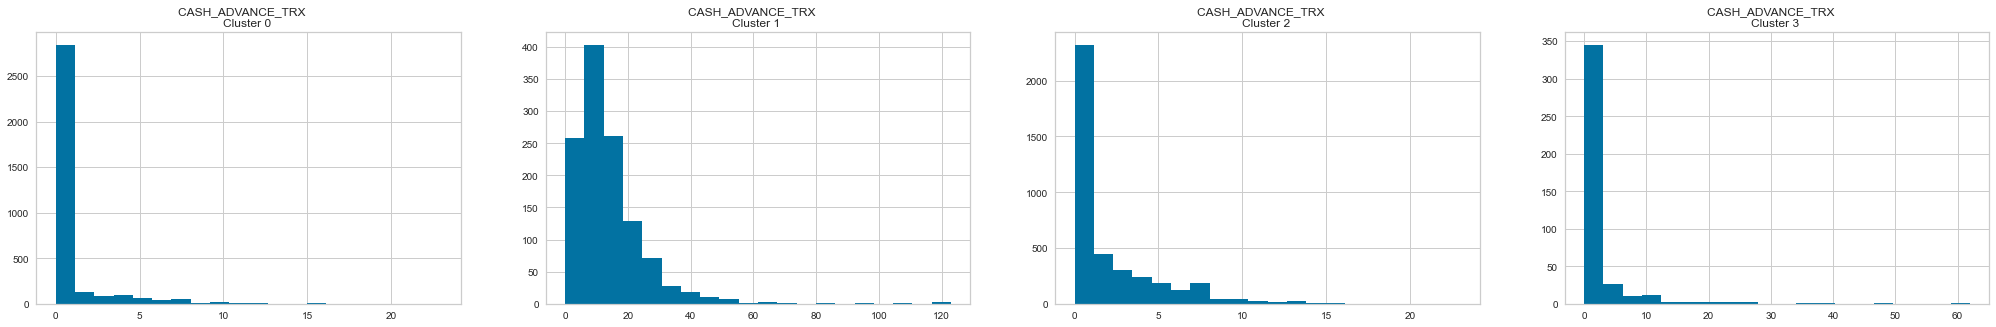

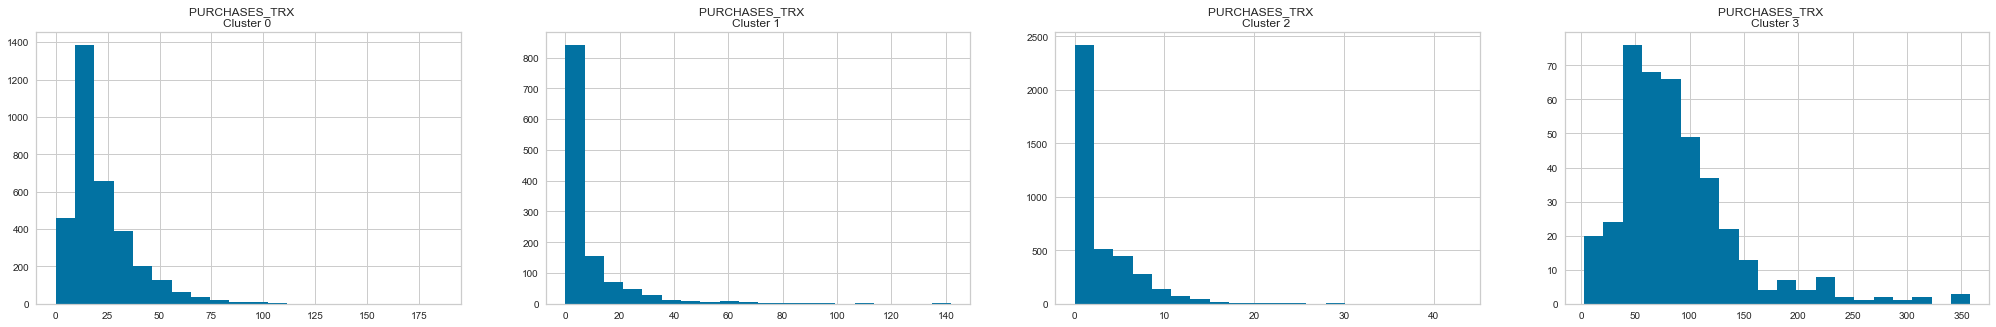

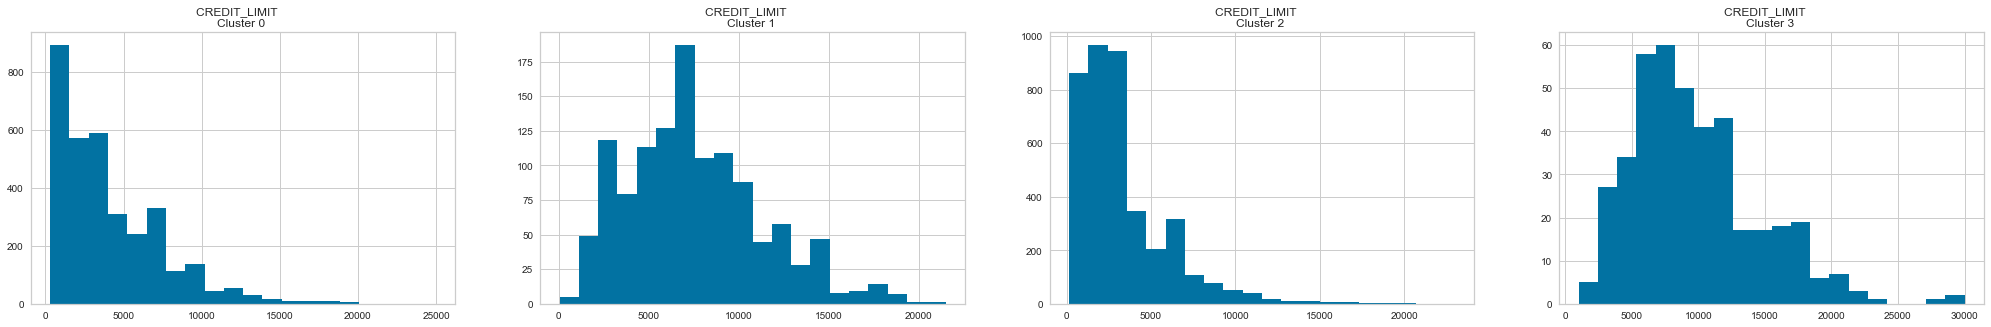

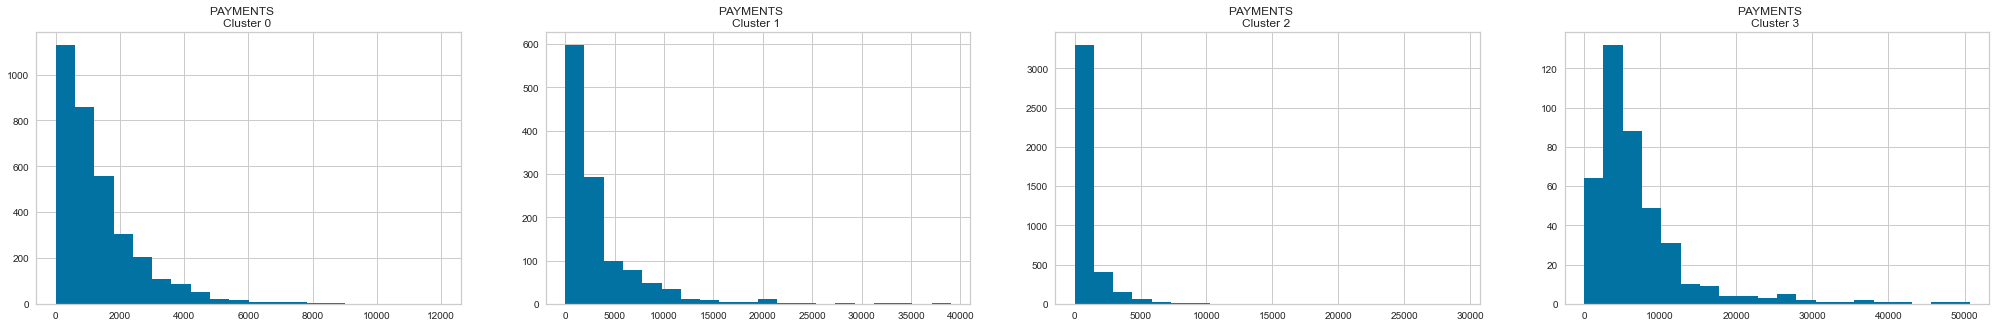

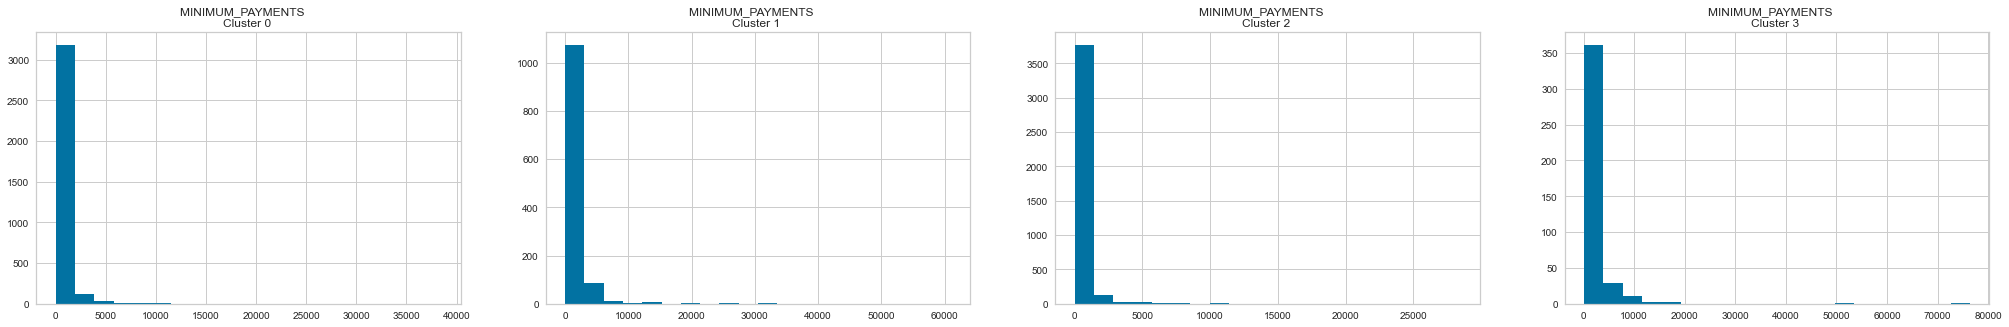

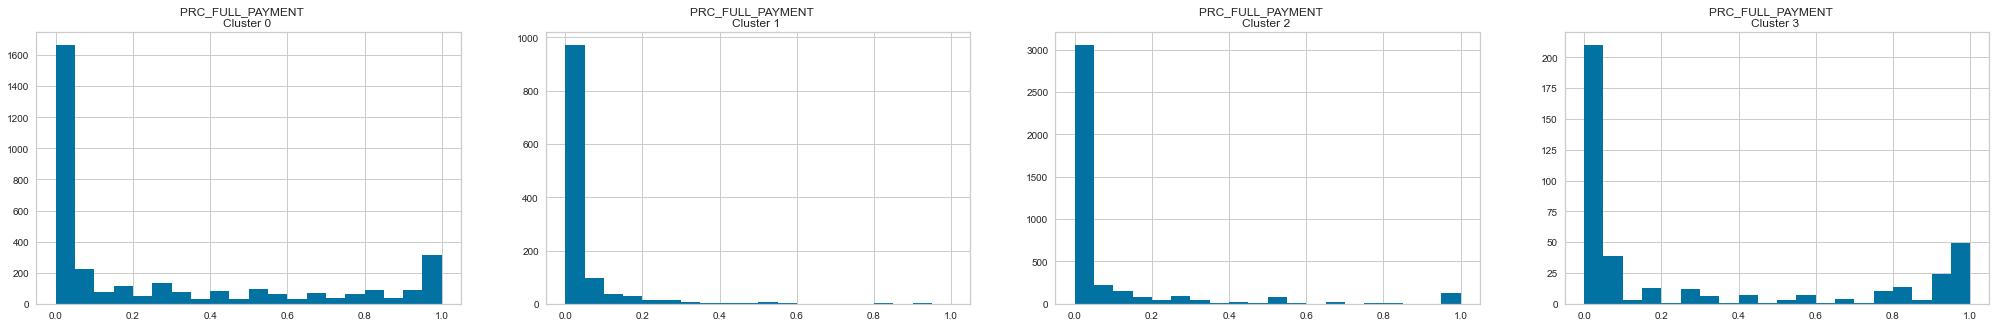

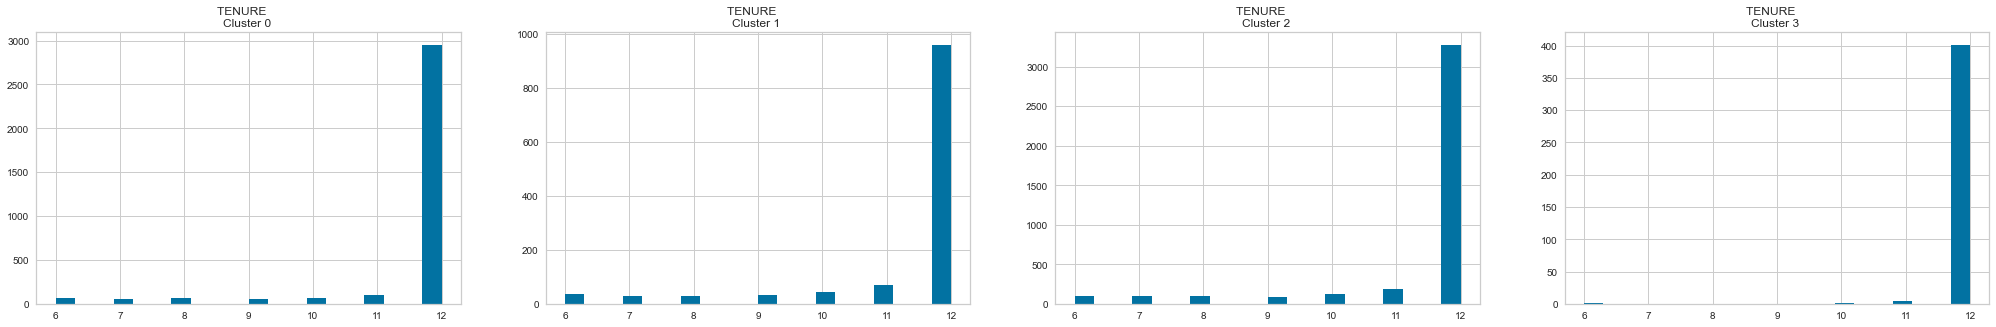

In [22]:
for column in credit_card_df.columns:
    plt.figure(figsize = (35, 5))
    for c in range(K):
        plt.subplot(1, K, c + 1)
        cluster = credit_card_df_cluster[credit_card_df_cluster["cluster"] == c]
        cluster[column].hist(bins = 20)
        plt.title(f'{column}    \nCluster {c} ')
        
plt.show()

## PCA to visualize the results

### PCA:
- is an unsupervised machine learning algorithm
- performs dimensionality reductions while attempting at keeping the original information unchanged
- works by trying to find a new set of features called components
- Components are composites of the uncorrelated given input features

PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 1-D, 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions.

### Obtain the principal components

In [23]:
pca = PCA(n_components = 2, random_state = 42)
principal_comp = pca.fit_transform(credit_card_df_scaled)
principal_comp

array([[-1.682221  , -1.07645288],
       [-1.13829151,  2.5064649 ],
       [ 0.96968531, -0.38351246],
       ...,
       [-0.92620616, -1.81078368],
       [-2.33655467, -0.65796417],
       [-0.55642094, -0.40046067]])

In [24]:
pca_df = pd.DataFrame(principal_comp, columns = ["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138292,2.506465
2,0.969685,-0.383512
3,-0.873628,0.043159
4,-1.599435,-0.688581


In [25]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076453,2
1,-1.138292,2.506465,1
2,0.969685,-0.383512,0
3,-0.873628,0.043159,2
4,-1.599435,-0.688581,2


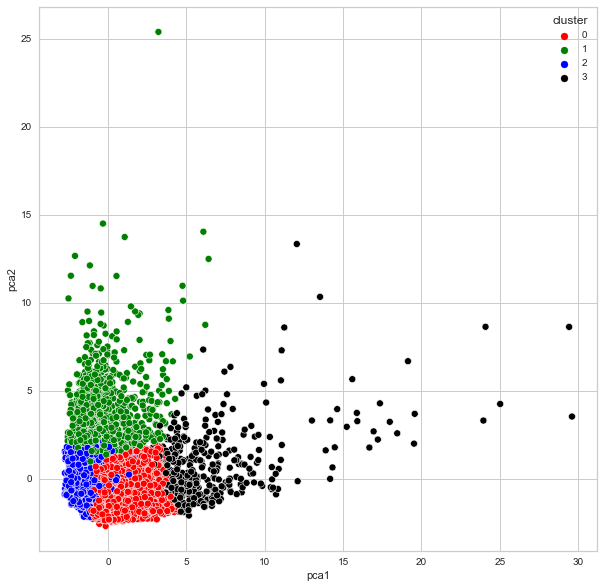

In [26]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ['red','green','blue','black'])
plt.show()

## Autoencoders (perform dimensionality reduction)

### Autoenconder:
- type of neural network that is used to perform a task of data encoding (representation learning)
- use the same input data for the input and output

### Code layer:
- they work by adding a bottleneck in the network
- this bottleneck forces the network to create a compressed (encoded) version of the original input
- they work well if correlations exists between input data (performs poorly if all the input data is independent)

### the math:
- encoder: $h(x) = sigmoid(W * x + b)$
- decoder: $\hat{x} = sigmoid(W' * h(x) + c)$
- tied weights: weights from input to hidden layer will be equal to the weights from hidden layer to output -> $W' = W^{T}$

In [27]:
input_shape = credit_card_df_scaled.shape[1] # number of features

## Encoder
encoder_input = keras.layers.Input(shape = (input_shape,))
l = keras.layers.Dense(500, activation = "relu")(encoder_input)
l = keras.layers.Dense(2000, activation = "relu")(l)
encoder_output = keras.layers.Dense(10, activation = "relu", name = "bottleneck")(l)
## Decoder
decoder_input = keras.layers.Dense(2000, activation = "relu")(encoder_output)
l = keras.layers.Dense(500, activation = "relu")(decoder_input)
decoder_output = keras.layers.Dense(input_shape)(l)
## Encoder and Autoencoder model
encoder = keras.Model(encoder_input, encoder_output, name = "encoder")
autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 500)               9000      
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
bottleneck (Dense)           (None, 10)                20010     
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              22000     
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_4 (Dense)              (None, 17)                

In [28]:
autoencoder.compile(optimizer="adam", loss="mse")
history = autoencoder.fit(credit_card_df_scaled, credit_card_df_scaled, batch_size = 128, epochs = 25)

Epoch 1/25
70/70 [==============================] - 1s 15ms/step - loss: 0.2697
Epoch 2/25
70/70 [==============================] - 1s 15ms/step - loss: 0.0629
Epoch 3/25
70/70 [==============================] - 1s 14ms/step - loss: 0.0381
Epoch 4/25
70/70 [==============================] - 1s 16ms/step - loss: 0.0282
Epoch 5/25
70/70 [==============================] - 1s 15ms/step - loss: 0.0241
Epoch 6/25
70/70 [==============================] - 1s 16ms/step - loss: 0.0183
Epoch 7/25
70/70 [==============================] - 1s 13ms/step - loss: 0.0161
Epoch 8/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0176
Epoch 9/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0173
Epoch 10/25
70/70 [==============================] - 1s 16ms/step - loss: 0.0203
Epoch 11/25
70/70 [==============================] - 1s 15ms/step - loss: 0.0136
Epoch 12/25
70/70 [==============================] - 1s 14ms/step - loss: 0.0123
Epoch 13/25
70/70 [==================

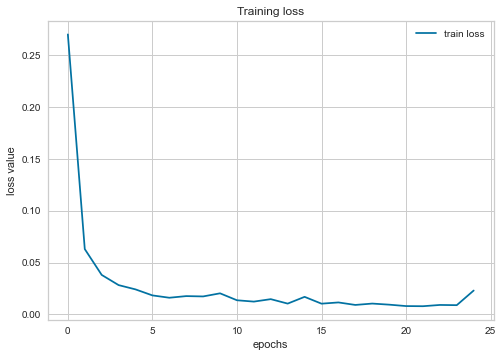

In [29]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss, label="train loss")
plt.title("Training loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend(loc="best")
plt.show()

In [30]:
encoder_pred = encoder.predict(credit_card_df_scaled)

## As we can see the number of features was reduced to 10

In [31]:
encoder_pred.shape

(8950, 10)

## Let´s find the optimal number of clusters for the reduced feature set

In [32]:
# scores_K_encoder = []

# for possible_K in possible_K_values:
#     kmeans = KMeans(possible_K, random_state = 42)
#     kmeans.fit(encoder_pred)
#     scores_K_encoder.append(kmeans.inertia_)

# plt.figure(figsize = (10, 10))
# plt.plot(scores_K_encoder, 'rx-')
# plt.title('Finding the right number of clusters')
# plt.xlabel('Clusters')
# plt.ylabel('Scores') 
# plt.show()

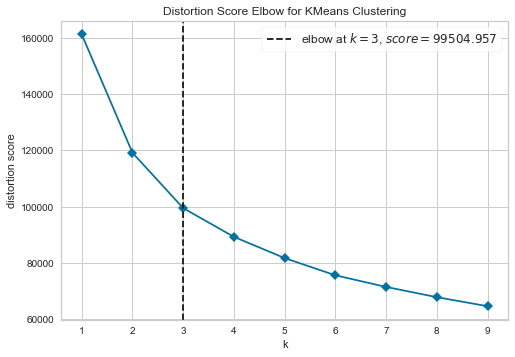

Optimal K value is 3


In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10), timings = False)
visualizer.fit(encoder_pred)
scores_K_encoder = visualizer.k_scores_
visualizer.show()
K = visualizer.elbow_value_
print(f"Optimal K value is {K}")

## Comparing the scores from the set with 17 features to the 10 feature one

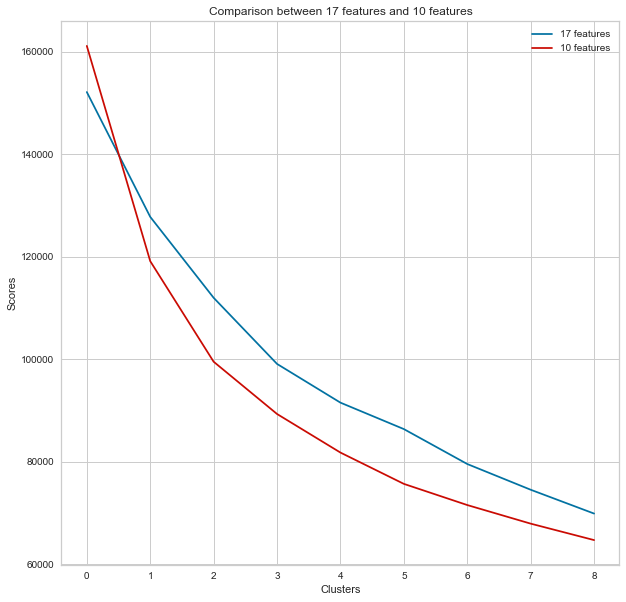

In [34]:
plt.figure(figsize = (10, 10))
plt.plot(scores_K, "bx-", label = "17 features")
plt.plot(scores_K_encoder, 'rx-', label = "10 features")
plt.title("Comparison between 17 features and 10 features")
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.legend(loc = "upper right")
plt.show()

In [35]:
kmeans = KMeans(K, random_state = 42)
kmeans.fit(encoder_pred)
labels = kmeans.labels_

In [36]:
df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [37]:
pca = PCA(n_components = 2, random_state = 42)
principal_comp = pca.fit_transform(encoder_pred)
pca_df = pd.DataFrame(principal_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.453796,-0.289984
1,-0.207570,1.315185
2,-0.089978,0.082420
3,-1.592142,-0.587881
4,-2.448544,-0.058737


In [38]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.453796,-0.289984,1
1,-0.207570,1.315185,1
2,-0.089978,0.082420,1
3,-1.592142,-0.587881,1
4,-2.448544,-0.058737,1


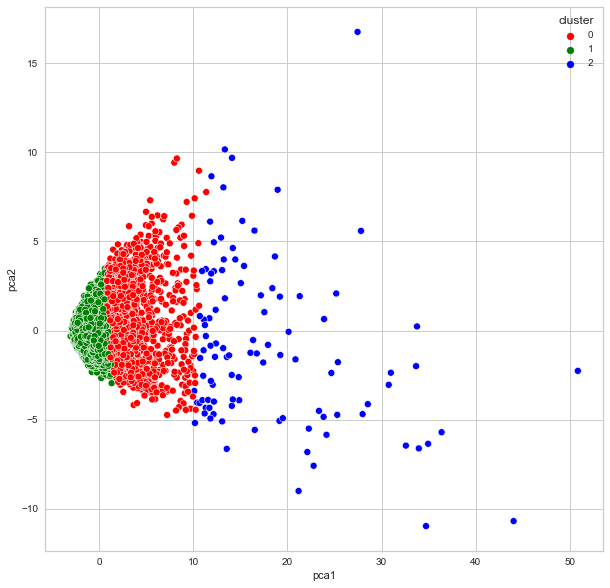

In [39]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ['red','green','blue'])
plt.show()